In [1]:
from core import *

In [2]:
## Requirements ## 

# 1) log file from gaussian scan 
# 2) skel.pdb (contains atoms and atom names in correct order - only needs to be created once) ** replace this w/ RTP entries somehow* much easier
# 3) plumed.dat (should contain CVs of interest and the scan coordinate, with AT=XXX -> refer to example file) **CAN WE WRITE A SCRIPT TO DO THIS?**
# 4) 

# Hash table contains name and residue corresponding to general atom in xyz file, where the row is signified by the key 
# if you build your .mol file in the right order (according to topol) this will make ur life much easier
hash_table = {1: ['CL', 'STN'],
              2: ['CLP', 'STN'],
              3: ['NL', 'STN'],
              4: ['CA', 'STN'],
              5: ['CLP', 'STC'],
              6: ['NR', 'STC'],
              7: ['CR', 'STC'],
              8: ['OL', 'STN'],
              9: ['OL', 'STC'],
              10: ['CB', 'STN'],
              11: ['CD', 'STC'],
              12: ['HA1', 'STN'],
              13: ['HA2', 'STN'],
              14: ['HL1', 'STN'],
              15: ['HL2', 'STN'],
              16: ['HL3', 'STN'],
              17: ['HR1', 'STC'],
              18: ['HR2', 'STC'],
              19: ['HR3', 'STC'],
              20: ['HB1', 'STN'],
              21: ['HB2', 'STN'],
              22: ['HB3', 'STN'],
              23: ['HD1', 'STC'],
              24: ['HD2', 'STC'],
              25: ['HD3', 'STC']}

In [1]:
# get residues from scan_atoms -> 2(CLP), 3(NL), 4(CA), 5(CLP)
# find and replace XXX/YYY/ZZZ/HHH with scan_atom residues (how do you determine reference angle?)
# for loop will iterate over different kappas
# kappa = [1.2, 1.4, 1.6, 1.8]
# kappa unit conversion 

# for i in kappa:
#     find_and_replace(skel_file, kappa)
#     md_energy()
#     calc_error

# plot all results


In [3]:
# Parse through Gaussian output
scan_coord, scan_energy = parse_logfile(logfile='c7beta_mp2_10deg.log', output_dir='xyz/', scan_atoms=[2,3,4,5], post_hartree_fock='MP2')

In [4]:
# Generate Gromacs Input
parse_xyz(xyz_dir='xyz/', hash_table=hash_table, skel_file='skel/skel.pdb', output_dir='pdb/')

In [5]:
# Calculate MM Energy
md_energy = run_md(scan_coord, scan_atoms=[15,12,7,5], mpirun=False, plumed=False)

finished scan 0
finished scan 1
finished scan 2
finished scan 3
finished scan 4
finished scan 5
finished scan 6
finished scan 7
finished scan 8
finished scan 9
finished scan 10
finished scan 11
finished scan 12
finished scan 13
finished scan 14
finished scan 15
finished scan 16
finished scan 17
finished scan 18
finished scan 19
finished scan 20
finished scan 21
finished scan 22
finished scan 23
finished scan 24
finished scan 25
finished scan 26
finished scan 27
finished scan 28
finished scan 29
finished scan 30
finished scan 31
finished scan 32
finished scan 33
finished scan 34
finished scan 35
finished scan 36
finished scan 37


In [6]:
# Read Energy into Date Frame 
scan_df = scan_to_dataframe(scan_coord, scan_energy, min_to_zero=True)
md_df = mdscan_to_dataframe(scan_coord, md_energy, min_to_zero=True)

scan_df = scan_df.sort_values(by=['coord_rev'])
md_df = md_df.sort_values(by=['coord_rev'])

In [7]:
# Calculate Error Metric 
calc_error(d1=scan_df['kcal'], d2=md_df['kcal'], rss_method='KLDIV')

0.7131691180771955

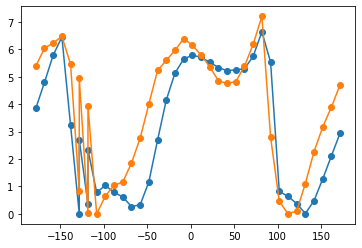

In [8]:
import matplotlib.pyplot as plt
import numpy as np

scan_df = scan_to_dataframe(scan_coord, scan_energy, min_to_zero=True)
md_df = mdscan_to_dataframe(scan_coord, md_energy, min_to_zero=True)

scan_df = scan_df.sort_values(by=['coord_rev'])
md_df = md_df.sort_values(by=['coord_rev'])

plt.plot(scan_df['coord_rev'], scan_df['kcal'],'-o')
plt.plot(md_df['coord_rev'], md_df['kcal'],'-o')
plt.show()